In [1]:
import numpy as np
import pandas as pd
import graph_tool.all as gt
import matplotlib.pyplot as plt
import pickle
import sys
import seaborn as sns
import os

In [2]:

# Specify the directory path
directory_path = 'states/'

# Get all files in the directory
file_names = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

# print(file_names)


In [3]:
file_names.sort()

In [4]:
file_names

['Topic_ALL__Post90_False__Randomize_Direction_False__Remove_Local_Field_True__Negative_Weights_Allowed_False_371d00e5-6e81-43ca-b53a-2dba56bdd866.pickle']

In [5]:
pickle_file = file_names[0]

In [6]:
# pickle_file = 'Topic_ALL__Post90_False__Randomize_Direction_False__Remove_Local_Field_True__Negative_Weights_Allowed_False_371d00e5-6e81-43ca-b53a-2dba56bdd866.pickle'

In [7]:
# File paths
file_path = 'data/clean_resolutions_v1.csv'
df_topic_labels_path = 'data/topic_labels.csv'

# Load data
resolution_only_votes_df = pd.read_csv(file_path, low_memory=False)

In [8]:
with open(directory_path + pickle_file, 'rb') as fout:
        state_dict = pickle.load(fout)

In [9]:
# Load the saved dictionary (assuming you already have `state_dict`)
# state_dict = ...

# Unpack each item in state_dict as a variable with the same name
for key, value in state_dict.items():
    globals()[key] = value  # This will create variables with the same names as the dictionary keys


In [10]:
if post_90:
    resolution_only_votes_df = resolution_only_votes_df.loc[ resolution_only_votes_df['year'] > 1990 ]

if topic != 'ALL':
    resolution_only_votes_df = resolution_only_votes_df.loc[ resolution_only_votes_df[topic] == True ]

In [11]:
if 'country' not in list( g.vp.keys() ):
    print('yes')

    countries = pd.read_csv('countries_list_temp.csv')
    
    countries = list( countries['0'] )
    
    vprop_label = g.new_vertex_property("string")
    
    for i in range( len(countries) ):
        vprop_label[ g.vertex(i) ] = countries[i]
    
    # bstate = state.get_block_state()
    
    g.vp.country = vprop_label

yes


In [12]:
countries_num = len( state.s[0] )

In [13]:
s = []
active = []
for country_ind in range( countries_num ):
    s.append( state.s[0][country_ind] )
    active.append( state.active[0][country_ind] )

In [14]:
s = np.array( s )
active = np.array( active )

In [15]:
edges = g.get_edges()

In [16]:
resolution_num = s.shape[1]

In [17]:
old_s = np.copy( s )
post_randomize_resolution_direction = False

In [18]:
if post_randomize_resolution_direction:
    direction_randomizer = np.random.choice([1, -1], size=s.shape[1])
    s = s * direction_randomizer


In [19]:
remove_local_field

True

In [38]:
def save_figure(fig, base_filename, topic, post_randomize_resolution_direction, post_90, negative_weight_allowed, remove_local_field, **kwargs):
    """Save figure with dynamically formatted filename."""
    binlabel = ''
    if 'binary' in pickle_file:
        binlabel = '-' + pickle_file.split('binary_')[-1].split('.pickle')[0]
    
    filename = f"./{base_filename}-{topic}-rand{post_randomize_resolution_direction}-p90{post_90}-negwt{negative_weight_allowed}-remLF{remove_local_field}{binlabel}"
    fig.savefig(f"{filename}.png", bbox_inches="tight", dpi=300, **kwargs)
    fig.savefig(f"{filename}.pdf", bbox_inches="tight", dpi=300, **kwargs)


# state version

In [39]:
edges = state.bstate.g.get_edges()

In [40]:
resolution_energies = []
node_energies = []
node_spins = []
node_local_fields = []
for resolution in range( resolution_num ):
    

    #node fields:
    node_energy = np.zeros( g.num_vertices() )
    node_local_field = np.copy( state.theta.a )

    start_nodes = ( edges[:, 0] )
    end_nodes = ( edges[:, 1] )
    
    # node_energy[ start_nodes ] += edge_energy * s[ start_nodes, resolution ]
    # node_energy[ end_nodes ] += edge_energy * s[ end_nodes, resolution ]

    # node_energy[ start_nodes ] += g.ep.x.a * s[ end_nodes, resolution ] * active[ end_nodes, resolution ]
    # node_energy[ end_nodes ] += g.ep.x.a * s[ start_nodes, resolution ] * active[ start_nodes, resolution ]

    np.add.at( node_energy, start_nodes, state.x.a * s[ end_nodes, resolution ] * active[ end_nodes, resolution ] )
    np.add.at( node_energy, end_nodes, state.x.a * s[ start_nodes, resolution ] * active[ start_nodes, resolution ] )
    node_energy += state.theta.a #local field

    #edge energies
    edge_activity = active[ edges[:,0]  , resolution] * active[ edges[:,1]  , resolution]
    edge_agreement = s[ edges[:,0]  , resolution]     * s[ edges[:,1]  , resolution]

    
    edge_energy = edge_agreement * edge_activity * state.x.a
    resolution_energy = edge_energy.sum()

    local_field_energy_contr = (s[:, resolution] * state.theta.a).sum()
    resolution_energy += local_field_energy_contr
    resolution_energy = -resolution_energy
    

    resolution_energies.append( resolution_energy )

    

    
    active_nodes_bool = np.bool_( active[:, resolution] )
    
    node_energies.extend( node_energy[ active_nodes_bool ] )
    node_spins.extend( s[ active_nodes_bool , resolution ] )
    node_local_fields.extend( node_local_field[ active_nodes_bool ] )

    # node_energies.extend( node_energy[ : ] )
    # node_spins.extend( s[ : , resolution ] )

In [41]:
node_spins = np.array( node_spins )
node_energies = np.array( node_energies )

In [42]:
node_energies.mean()

2.059433748695085

In [43]:
node_energies.mean()

2.059433748695085

In [29]:
len( node_spins )

845687

(array([ 47418.,      0.,      0.,      0.,      0., 171151.,      0.,
             0.,      0., 627118.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

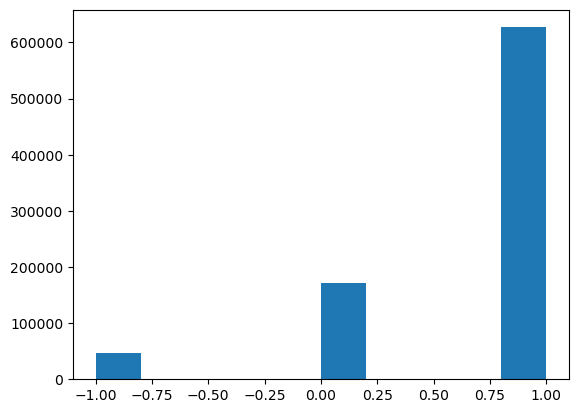

In [30]:
plt.hist(node_spins)

In [31]:
len( node_energies )

845687

In [32]:
abs_max = np.max( [np.abs( np.min(node_energies) ), np.abs( np.max(node_energies))] )

In [33]:
def prob_analytical(spin_value, x, beta, alpha, possible_spin_values = [-1, 0, 1]):
    # possible_spin_values = [-1, 1]
    # if has_zeros:
        # possible_spin_values.append(0)
    Z = 0
    for possible_spin in possible_spin_values:
        Z += non_normal_prob(possible_spin, x, beta, alpha)
        # print(Z)
    # print(Z)
    print(possible_spin_values)
    
    return non_normal_prob(spin_value, x, beta, alpha) / Z


In [34]:
def non_normal_prob(spin_value, x, beta, alpha):
    return np.exp(beta * (spin_value * x -  (spin_value ** 2) * alpha ))

In [35]:
# prob_analytical(spin_value, bin_centers, beta, alpha)

In [36]:
beta = 1

alpha = 0


[-1  0  1]
[-1  0  1]
[-1  0  1]


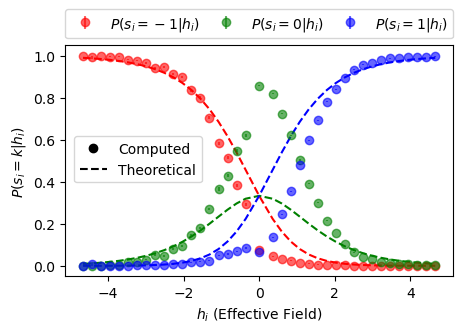

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Import for custom legend handles

# Assuming node_energies and node_spins are defined
num_bins = 40
abs_max = np.max(np.abs(node_energies))  
bins = np.linspace(-abs_max, abs_max, num_bins + 1)
bins = list(bins)
if 0 in bins:
    bins.remove(0)
bins = np.sort(bins)
bin_centers = (bins[:-1] + bins[1:]) / 2  

# spin_values = [-1, 0, 1]
spin_values = np.unique( s[ active != 0 ] )
spin_probabilities = {spin_value: [] for spin_value in spin_values}
spin_errors = {spin_value: [] for spin_value in spin_values}

for i in range(len(bins) - 1):
    in_bin = (node_energies >= bins[i]) & (node_energies < bins[i + 1])
    if np.sum(in_bin) > 0:
        for spin_value in spin_values:
            probability = np.mean(node_spins[in_bin] == spin_value)
            spin_probabilities[spin_value].append(probability)
            std_error = np.sqrt(probability * (1 - probability) / np.sum(in_bin))
            spin_errors[spin_value].append(std_error)
    else:
        for spin_value in spin_values:
            spin_probabilities[spin_value].append(np.nan)
            spin_errors[spin_value].append(np.nan)

# Set up the plot
fig, ax_main = plt.subplots(figsize=(5, 3))  # Only the left axis
colors = {-1: "red", 0: "green", 1: "blue"}

# 🎯 Left plot (Full Range)
for spin_value in spin_values:
    ax_main.errorbar(
        bin_centers, spin_probabilities[spin_value], yerr=spin_errors[spin_value],
        fmt="o", color=colors[spin_value], alpha=0.6, label=f"$P(s_i = {spin_value} | h_i)$"
    )
    ax_main.plot(
        bin_centers,
        prob_analytical(spin_value=spin_value, x=bin_centers, beta=beta, alpha=alpha, possible_spin_values=spin_values),
        color=colors[spin_value], linestyle="--"
    )

# Custom legend handles for the new symbols (Empirical and Theoretical)
empirical_handle = Line2D([0], [0], marker='o', color='black', linestyle='None', markersize=6, label='Empirical')
theoretical_handle = Line2D([0], [0], linestyle='--', color='black', label='Theoretical')

# Update main plot legend with the original and empirical/theoretical labels
ax_main.set_xlabel("$h_i$ (Effective Field)")
ax_main.set_ylabel("$P(s_i = k | h_i)$")

ax_main.legend(
    handles=[*ax_main.get_legend_handles_labels()[0]], 
    labels=[*ax_main.get_legend_handles_labels()[1]],
    bbox_to_anchor=(0, 1.03, 1.0, 0.2), 
    loc="lower left", mode="expand", borderaxespad=0, ncol=3, fontsize="10"
)

# Add the second legend for the 'Empirical' and 'Theoretical' symbols
# Create a new axis for the secondary legend
ax_legend = fig.add_axes([0.2, 0.45, 0.14, 0.1], frameon=False)  # Left-center position of the figure
ax_legend.axis('off')  # Hide the axis
ax_legend.legend(
    handles=[empirical_handle, theoretical_handle], 
    labels=['Computed', 'Theoretical'],
    loc='center', 
    fontsize='10'
)

# Add alpha text annotation if needed
if alpha:
    ax_main.text(0.05, 0.5, f'${{\\alpha = {alpha}}}$', 
                 horizontalalignment='left', 
                 verticalalignment='center', 
                 transform=ax_main.transAxes,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

base_filename = "conditional-prob-full-range"

if alpha:
    base_filename += f"-alpha-{alpha}"

# fig.tight_layout()

# Save and show
save_figure(fig, base_filename, topic, post_randomize_resolution_direction, post_90, negative_weight_allowed, remove_local_field)
plt.show()
